<a href="https://colab.research.google.com/github/YashJangid04/Market-Basket-Analysis/blob/main/Yash_Jangid_202401100400216.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [24]:
# Load your dataset
df = pd.read_csv("data.csv")


No predicted labels found. Proceeding with clustering and segmentation...



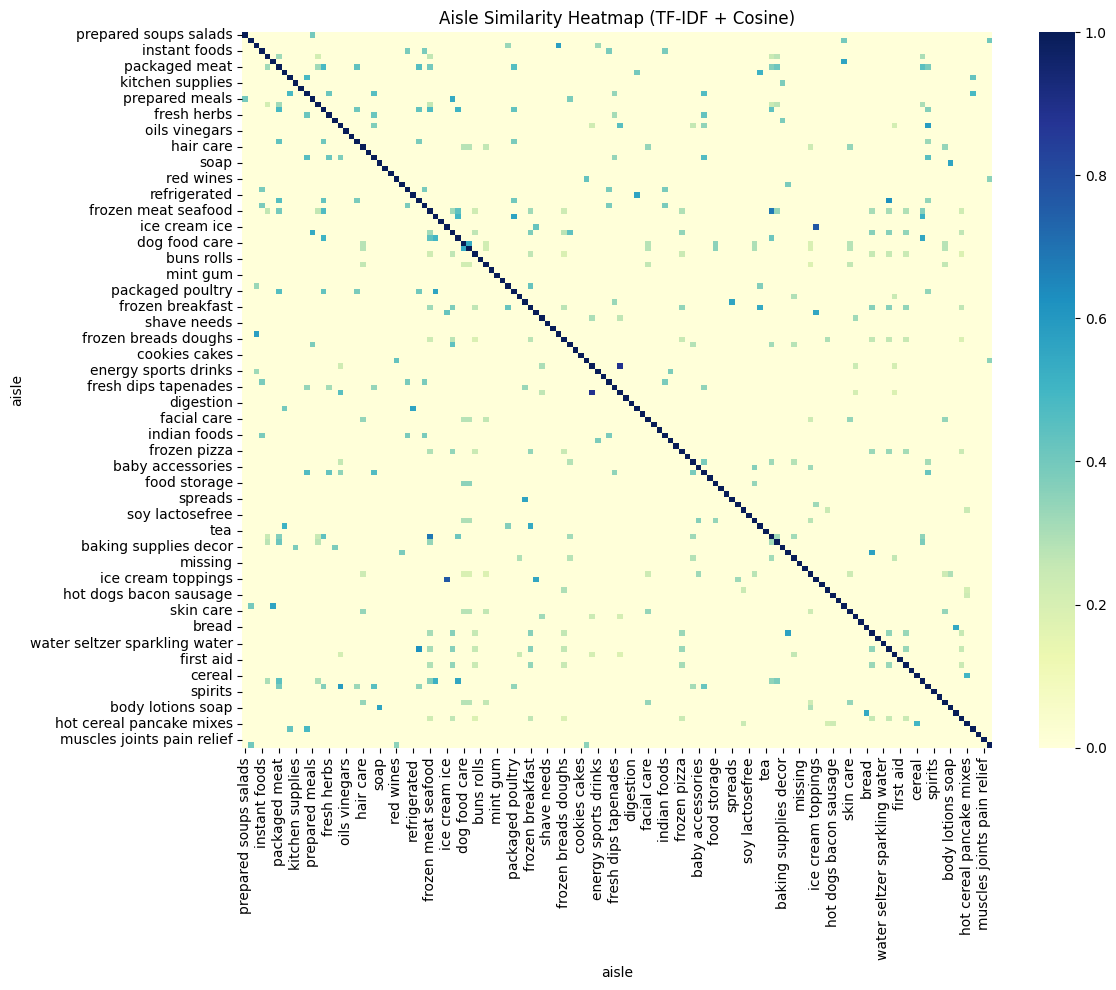

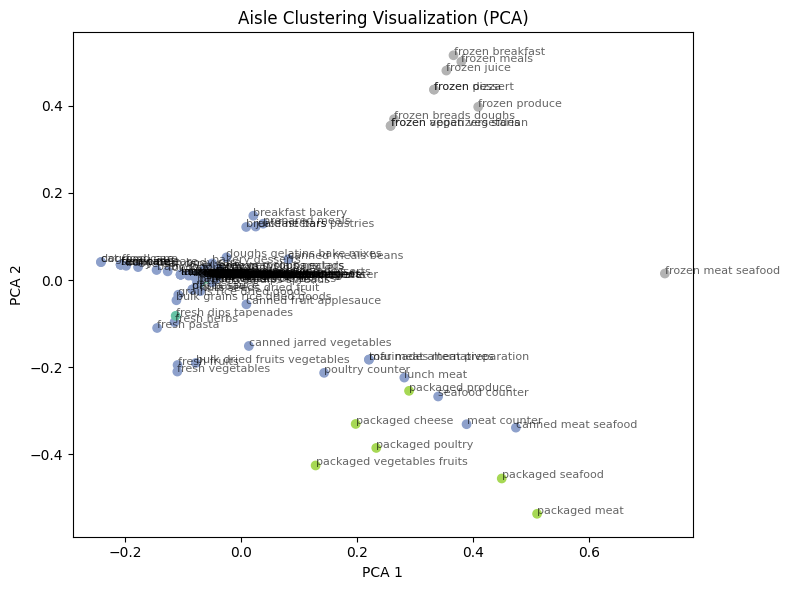

                        aisle  cluster
       preserved dips spreads        0
         fresh dips tapenades        0
                      spreads        0
        prepared soups salads        1
   marinades meat preparation        1
                        other        1
          energy granola bars        1
            specialty cheeses        1
                  fresh herbs        1
             cold flu allergy        1
                  fresh pasta        1
               prepared meals        1
       tofu meat alternatives        1
                 oral hygiene        1
              bakery desserts        1
                instant foods        1
        honeys syrups nectars        1
                 latino foods        1
                beers coolers        1
                    hair care        1
                 fresh fruits        1
                popcorn jerky        1
                       coffee        1
                         soap        1
                 refriger

In [25]:

# Check for classification columns
has_classification = {'true_label', 'predicted_label'}.issubset(df.columns)

if has_classification:
    # -----------------------------
    # Classification Evaluation
    # -----------------------------
    y_true = df['true_label']
    y_pred = df['predicted_label']
    unique_labels = sorted(list(set(y_true) | set(y_pred)))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred, labels=unique_labels)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=unique_labels, yticklabels=unique_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

    # Metrics
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))

else:
    # -----------------------------
    # Clustering and Heatmap (No Labels)
    # -----------------------------
    print("No predicted labels found. Proceeding with clustering and segmentation...\n")

    # TF-IDF vectorization of aisle names
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(df['aisle'])

    # Cosine similarity heatmap
    similarity = cosine_similarity(tfidf_matrix)
    sim_df = pd.DataFrame(similarity, index=df['aisle'], columns=df['aisle'])

    plt.figure(figsize=(12, 10))
    sns.heatmap(sim_df, cmap="YlGnBu")
    plt.title("Aisle Similarity Heatmap (TF-IDF + Cosine)")
    plt.tight_layout()
    plt.show()

    # Clustering aisles using KMeans
    kmeans = KMeans(n_clusters=5, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)
    df['cluster'] = cluster_labels

    # Reduce to 2D with PCA
    pca = PCA(n_components=2)
    coords = pca.fit_transform(tfidf_matrix.toarray())

    plt.figure(figsize=(8, 6))
    plt.scatter(coords[:, 0], coords[:, 1], c=cluster_labels, cmap='Set2')
    for i, txt in enumerate(df['aisle']):
        plt.annotate(txt, (coords[i, 0], coords[i, 1]), fontsize=8, alpha=0.6)
    plt.title("Aisle Clustering Visualization (PCA)")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.tight_layout()
    plt.show()

    print(df[['aisle', 'cluster']].sort_values(by='cluster').to_string(index=False))